# 居民电力负荷聚类

In [1]:
pwd

'D:\\sunfl\\sunflower\\OneDrive - mail.shiep.edu.cn\\study\\机器学习\\聚类算法\\AP'

In [2]:
cd ..\..\..

D:\sunfl\sunflower\OneDrive - mail.shiep.edu.cn\study


In [3]:
cd D:\sunfl\sunflower\OneDrive - mail.shiep.edu.cn\study\课题组\论文进度\数据\CER\CER_Electricity\CER Electricity Revised March 2012\CER_Electricity_Documentation

D:\sunfl\sunflower\OneDrive - mail.shiep.edu.cn\study\课题组\论文进度\数据\CER\CER_Electricity\CER Electricity Revised March 2012\CER_Electricity_Documentation


## 背景

本文工作受`8.有标签电力负荷数据.ipynb`启发，单独对居民电力用户进行聚类分析，探索居民电力用户类型。

`SME and Residential allocations.xlsx`文件中包含电表的分类信息。  
- residential(Code 1)
- small-to-medium enterprises(SME)(Code 2)
- others(Code 3)

典型日负荷曲线：

In [4]:
import numpy as np

cluster_center = np.load("cluster_center.npy")
cluster_label = np.load("cluster_label.npy")

筛选出居民用户：

In [5]:
residential = cluster_center[cluster_label == 1]

## 相似度量

In [6]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from itertools import product  

distance_matrix = []
for x, y in product(residential, residential):
    distance, path = fastdtw(x, y, dist=euclidean)
    distance_matrix.append(distance)

distance_matrix = np.array(distance_matrix).reshape(len(residential), len(residential))

In [7]:
rd_distance_matrix = distance_matrix
np.save("rd_distance_matrix.npy", rd_distance_matrix)

## 聚类分析

计算最佳preference:

In [52]:
list_preference = []

for index, preference in enumerate(range(20, 100)):
    ap = AffinityPropagation(affinity='precomputed', preference=-preference)
    af = ap.fit(-distance_matrix)
    labels = af.labels_  
    list_preference.append([index, metrics.calinski_harabaz_score(distance_matrix, labels)])
list_preference

[[0, 1126.326674206192],
 [1, 1138.391623738243],
 [2, 1356.626142999187],
 [3, 1140.212981433431],
 [4, 1153.0052661211814],
 [5, 1337.7395649323623],
 [6, 1405.1422354096508],
 [7, 1405.1422354096508],
 [8, 1405.1422354096508],
 [9, 1341.5799836884546],
 [10, 1341.5799836884546],
 [11, 1378.8636045637197],
 [12, 1361.6586252508293],
 [13, 1231.4813804791813],
 [14, 1461.6339752269841],
 [15, 1491.0786736418945],
 [16, 325.59458665971636],
 [17, 292.1794781960125],
 [18, 312.987509163293],
 [19, 301.3014339929605],
 [20, 324.4026234454069],
 [21, 325.59458665971636],
 [22, 325.59458665971636],
 [23, 337.7376010614706],
 [24, 337.7376010614706],
 [25, 339.5306496999249],
 [26, 339.5509501521904],
 [27, 339.5509501521904],
 [28, 346.7723188453423],
 [29, 369.20437952728383],
 [30, 370.5463628958281],
 [31, 370.5463628958281],
 [32, 370.5463628958281],
 [33, 370.5463628958281],
 [34, 370.5463628958281],
 [35, 339.5306496999249],
 [36, 945.259071945247],
 [37, 978.3598504874806],
 [38, 97

In [37]:
np.average(distance_matrix)

35.882630239273176

In [38]:
np.max(distance_matrix)

436.15115000000003

In [56]:
from sklearn.cluster import AffinityPropagation
import time
from sklearn import metrics#评价指标

ap = AffinityPropagation(affinity='precomputed', preference=-57)
t0 = time.time()
af = ap.fit(-distance_matrix)
ap_time = time.time() - t0#算法运行时间
#vars(af)
cluster_centers_indices = af.cluster_centers_indices_ #预测出的中心点的索引，如[123,23,34]
labels = af.labels_   #预测出的每个数据的类别标签，labels是一个Numpy数组
n_clusters_ = len(cluster_centers_indices)  #预测聚类中心的个数
print('预测的聚类中心个数：%d' % n_clusters_)
#print('调整兰德指数：%0.3f' % metrics.adjusted_rand_score(cluster_label, labels))
#print('调整互信息：%0.3f' % metrics.adjusted_mutual_info_score(cluster_label, labels))
#print('同质性：%0.3f' % metrics.homogeneity_score(cluster_label, labels))
#print('完整性：%0.3f' % metrics.completeness_score(cluster_label, labels))
#print('v-值：%0.3f' % metrics.v_measure_score(cluster_label, labels))
print('轮廓系数：%0.3f' % metrics.silhouette_score(distance_matrix, labels, metric='precomputed'))
print('calinski_harabaz_score：%0.3f' % metrics.calinski_harabaz_score(distance_matrix, labels))

预测的聚类中心个数：11
轮廓系数：0.287
calinski_harabaz_score：978.360


In [53]:
np.average(distance_matrix)

35.882630239273176

In [8]:
from sklearn.cluster import AffinityPropagation
import time
from sklearn import metrics#评价指标

ap = AffinityPropagation(affinity='precomputed', preference=-np.average(distance_matrix))
t0 = time.time()
af = ap.fit(-distance_matrix)
ap_time = time.time() - t0#算法运行时间
#vars(af)
cluster_centers_indices = af.cluster_centers_indices_ #预测出的中心点的索引，如[123,23,34]
labels = af.labels_   #预测出的每个数据的类别标签，labels是一个Numpy数组

n_clusters_ = len(cluster_centers_indices)  #预测聚类中心的个数
print('预测的聚类中心个数：%d' % n_clusters_)
#print('调整兰德指数：%0.3f' % metrics.adjusted_rand_score(cluster_label, labels))
#print('调整互信息：%0.3f' % metrics.adjusted_mutual_info_score(cluster_label, labels))
#print('同质性：%0.3f' % metrics.homogeneity_score(cluster_label, labels))
#print('完整性：%0.3f' % metrics.completeness_score(cluster_label, labels))
#print('v-值：%0.3f' % metrics.v_measure_score(cluster_label, labels))
print('轮廓系数：%0.3f' % metrics.silhouette_score(distance_matrix, labels, metric='precomputed'))
print('calinski_harabaz_score：%0.3f' % metrics.calinski_harabaz_score(distance_matrix, labels))

预测的聚类中心个数：12
轮廓系数：0.269
calinski_harabaz_score：325.595


## 绘制负荷曲线

In [12]:
import pandas as pd

data = pd.DataFrame(residential)
data

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.310650,0.175600,0.109450,0.100500,0.097850,0.093650,0.094700,0.097300,0.090950,0.090600,...,0.160000,0.199850,0.217450,0.235600,0.280900,0.292900,0.333350,0.325050,0.325650,0.316050
1,0.254316,0.240632,0.165368,0.180474,0.160579,0.163737,0.166211,0.159895,0.165684,0.163684,...,0.243684,0.268105,0.213579,0.246263,0.266263,0.304053,0.287368,0.303526,0.300895,0.290632
2,0.390316,0.443684,0.519000,0.547421,0.387263,0.303053,0.215632,0.191316,0.183947,0.173421,...,1.241421,0.870684,1.010158,0.581789,0.413526,0.363895,0.474368,0.485263,0.338737,0.419000
3,0.292950,0.271100,0.242700,0.244050,0.222650,0.235500,0.222300,0.256600,0.193500,0.251750,...,0.336050,0.422850,0.336600,0.417800,0.398400,0.407600,0.403100,0.417600,0.349600,0.310200
4,0.014000,0.014000,0.014000,0.014000,0.014000,0.014000,0.014000,0.014000,0.014000,0.014000,...,0.014600,0.061800,0.098350,0.048100,0.015600,0.089300,0.219000,0.221250,0.214050,0.148400
5,1.702050,1.248800,0.953500,0.906050,0.830250,0.835750,0.845150,0.823650,0.782100,0.774300,...,1.329400,1.369750,1.686000,1.885300,2.023800,2.419750,2.516450,2.503350,2.425050,2.292550
6,0.654100,0.295800,0.212450,0.127500,0.107850,0.120350,0.102400,0.098850,0.093000,0.095100,...,0.482000,0.562900,0.432700,0.262050,0.273850,0.331050,0.383250,0.263100,0.575400,0.922850
7,0.169200,0.219650,0.129300,0.107800,0.116350,0.089900,0.085250,0.082900,0.082950,0.084650,...,0.251650,0.369050,0.278000,0.797750,0.614800,0.724900,0.703050,0.416550,0.323200,0.264550
8,0.229158,0.189632,0.181474,0.184158,0.152421,0.158947,0.116684,0.148316,0.112895,0.143053,...,0.509053,0.644421,0.571316,0.734947,0.663579,0.525105,0.586632,0.463316,0.420895,0.330158
9,0.130350,0.119150,0.105400,0.108050,0.104150,0.096450,0.099450,0.100150,0.095550,0.164350,...,0.345050,0.311350,0.321900,0.230100,0.294900,0.250550,0.194650,0.171700,0.196500,0.156400


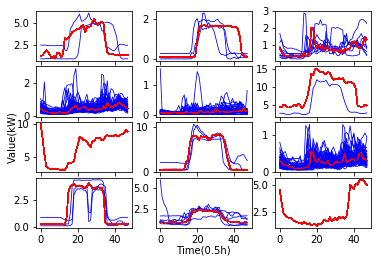

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

pic_data = data.T

fig, axes = plt.subplots(4, 3, sharex=True)
for index, label in enumerate(labels):
    if label == 0:
        axes[0, 0].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 1:
        axes[0, 1].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 2:
        axes[0, 2].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 3:
        axes[1, 0].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 4:
        axes[1, 1].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 5:
        axes[1, 2].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 6:
        axes[2, 0].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 7:
        axes[2, 1].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 8:
        axes[2, 2].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 9:
        axes[3, 0].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 10:
        axes[3, 1].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    if label == 11:
        axes[3, 2].plot(pic_data[pic_data.columns[index]], 'b', linewidth=0.8)
    axes[0, 0].plot(pic_data[pic_data.columns[cluster_centers_indices[0]]], 'r', linewidth=0.8)
    axes[0, 1].plot(pic_data[pic_data.columns[cluster_centers_indices[1]]], 'r', linewidth=0.8)
    axes[0, 2].plot(pic_data[pic_data.columns[cluster_centers_indices[2]]], 'r', linewidth=0.8)
    axes[1, 0].plot(pic_data[pic_data.columns[cluster_centers_indices[3]]], 'r', linewidth=0.8)
    axes[1, 1].plot(pic_data[pic_data.columns[cluster_centers_indices[4]]], 'r', linewidth=0.8)
    axes[1, 2].plot(pic_data[pic_data.columns[cluster_centers_indices[5]]], 'r', linewidth=0.8)
    axes[2, 0].plot(pic_data[pic_data.columns[cluster_centers_indices[6]]], 'r', linewidth=0.8)
    axes[2, 1].plot(pic_data[pic_data.columns[cluster_centers_indices[7]]], 'r', linewidth=0.8)
    axes[2, 2].plot(pic_data[pic_data.columns[cluster_centers_indices[8]]], 'r', linewidth=0.8)
    axes[3, 0].plot(pic_data[pic_data.columns[cluster_centers_indices[9]]], 'r', linewidth=0.8)
    axes[3, 1].plot(pic_data[pic_data.columns[cluster_centers_indices[10]]], 'r', linewidth=0.8)
    axes[3, 2].plot(pic_data[pic_data.columns[cluster_centers_indices[11]]], 'r', linewidth=0.8)
plt.subplots_adjust(wspace=0.25, hspace=0.1) 
axes[1, 0].set_ylabel("Value(kW)")
axes[3, 1].set_xlabel("Time(0.5h)", labelpad = 12.5)
axes[3, 1].xaxis.set_label_coords(0.5, -0.35)
axes[1, 0].yaxis.set_label_coords(-0.2, -0.4)

RD_fig = plt.gcf() # 'get current figure'
RD_fig.savefig('RD.pdf', format='pdf', dpi=1000)
plt.show()

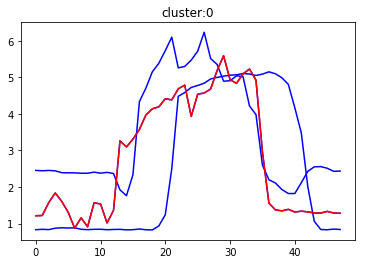

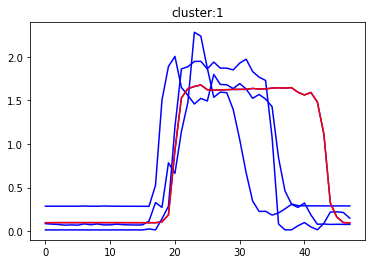

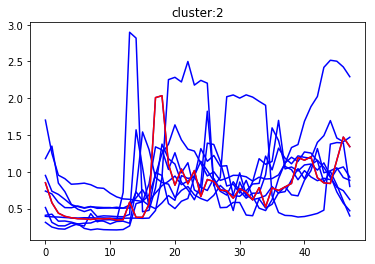

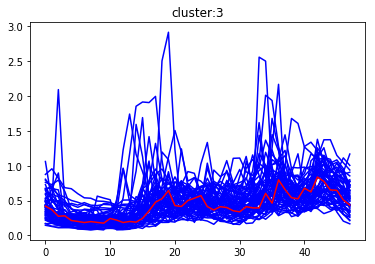

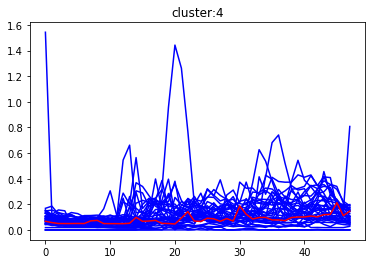

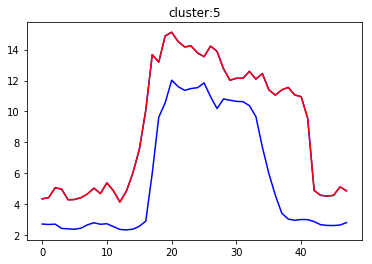

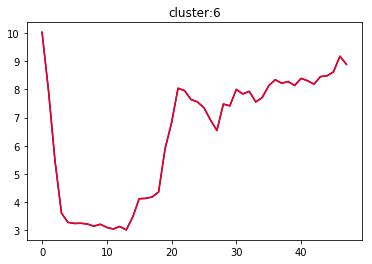

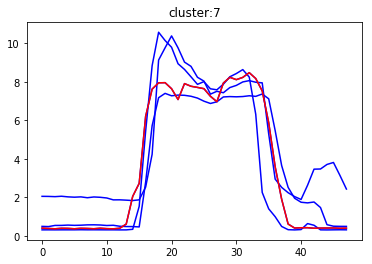

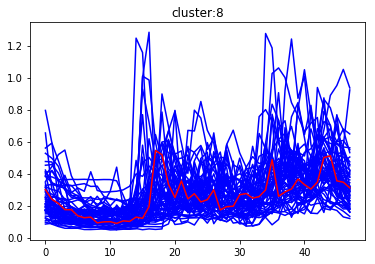

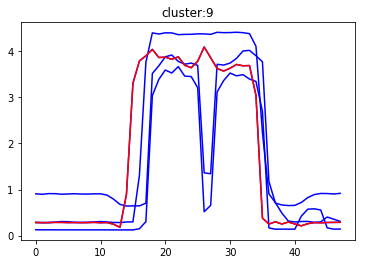

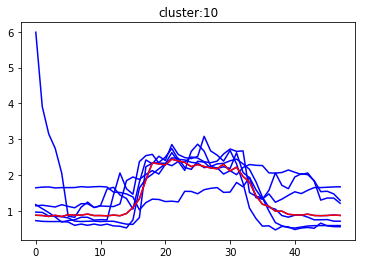

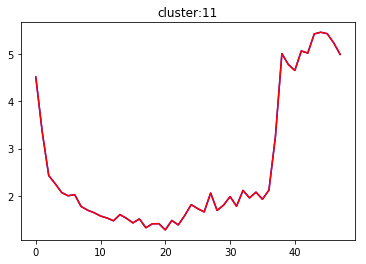

In [10]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

for one_cluster in range(n_clusters_):
    for index, label in enumerate(labels):
        if label == one_cluster:
            plt.plot(residential[index].T, color='b')
    plt.plot(residential[cluster_centers_indices[one_cluster]], color='r')
    plt.title("cluster:" + str(one_cluster))
    plt.show()

绘制子图的时候，共享坐标轴导致可视化效果太差，思考要不要增加标准化操作。